In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# **2.1 M-Estimation**

*M-Estimation* proposes the following objective function to be minimized:

$$ \sum_{i=1}^{n} \rho (e_{i}) = \sum_{i=1}^{n} \rho (Y_{i} - X_{i}^{T} \beta ) $$

We can see $\rho $ is the contribution of each residual to the *M-estimation* objective function. $\rho(\cdot)$ should have the following properties:

1. $\rho (e) \geq 0 $  i.e. $\rho $ cannot be negative
2. $\rho (0) = 0$ i.e. When the argument of $\rho $ is 0, $\rho $ is also $0$
3. $\rho (e) = \rho (-e)$ i.e. $\rho $ is symmetric
4. When $|e_{i}| > |e_{j}|$, then $\rho (e_{i})> \rho (e_{j})$ i.e. $\rho $ is monotone

Let's take a quick look of some $\rho$ examples. Two of the popular $\rho$ functions are $\rho (e) = e^{2}$ and $\rho (e) = |e|$. We will talk more about them later in this lesson.

We then take the partial derivatives of this objective function with respect to $\beta$ and set them to $0$. We will get the following equations:

$\sum_{i=1}^{n} \rho (Y_{i} - X_{i}^{t} \beta)$
$$ \begin{bmatrix}
\frac{\partial \rho}{\partial \beta_1} \sum_{i=1}^{n} \rho (Y_{1} - X_{1}^{T} \beta) \\
\frac{\partial \rho}{\partial \beta_2} \sum_{i=1}^{n} \rho (Y_{2} - X_{2}^{T} \beta) \\
. \\
. \\
. \\
\frac{\partial \rho}{\partial \beta_1} \sum_{i=1}^{n} \rho (Y_{n} - X_{n}^{T} \beta)

\end{bmatrix} $$

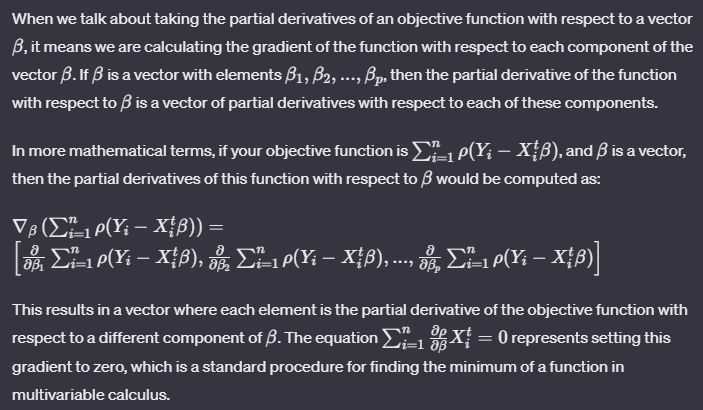

Let's assign $\psi (e) = \frac{\partial \rho }{\partial e}$. $\ \psi$ is called an **influence function.**

We can rewrite the above equations as follows:

$$ \sum_{i=1}^{n} \psi (e_{i}) X_{i}^{T} = 0 $$

Let's define a weight function $w (e) = \frac{\psi (e)}{e}$ and let $w(e_{i}) = w_{i}$.

We can rewrite the above function again as follows:

$$ \sum_{i=1}^{n} w_{i} e_{i} X_{i}^{T} = 0 $$


Why did we do all these steps? If you look at the above equation, it is the same partial derivative equation from the WLS lesson. We have transformed the *M-estimation* to weighted least square regression. 

Now, we have to calculate the estimates of *M-estimation*. From the above description, it is the same as solving a WLS problem. From our weight formula, we know the weights depend on residuals. The residuals depend on estimated coefficients. The coefficients depend on weights. It is a circle. We usually would start from estimating the coefficients using OLS. Then, we'd get the residuals and estimate the weights, and we would estimate weighted least square regression and repeat the whole process again. This is called **iterative reweighted least squares** **regression (IRLS).**

Here are the steps of **iterative reweighted least squares** regression:

1. Use OLS to estimate initial coefficients.
2. Obtain the residuals of the OLS model and generate weights.
3. Estimate coefficients using WLS and the weights from Step 2.
4. Plug coefficients from WLS into the linear model and calculate new residuals and repeat from Step 2 to Step 4 until the coefficients converge.